In [0]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [0]:
from sklearn.datasets import load_boston


In [0]:
house_price = load_boston()
df = pd.DataFrame(house_price.data,
                  columns = house_price.feature_names)


In [143]:
#checking if any data is empty
check=df.isnull()
check.sum()
#output shows no empty values

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [144]:
df['PRICE'] = house_price.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [145]:
print(house_price.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [146]:
X= df.drop(axis=1,columns='PRICE')
Y= df['PRICE']
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Task 1: splitting the data


In [147]:
import sklearn.model_selection
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.30, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(354, 13)
(152, 13)
(354,)
(152,)


In [148]:

from sklearn.linear_model import LinearRegression

OLS_model = LinearRegression(fit_intercept=True,normalize=False,copy_X=True)
OLS_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [149]:
b_coef= OLS_model.coef_
print(b_coef[12])

-0.4867380656449212


In [150]:
B= pd.DataFrame(data=b_coef,index=X.columns)
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

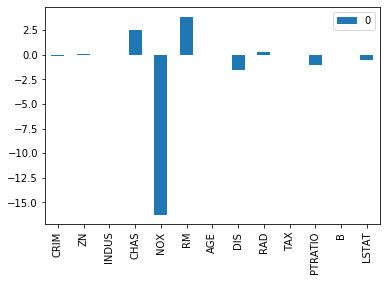

In [151]:
B.plot.bar()

Task2


In [152]:

print(X.shape)


(506, 13)


In [153]:
df3 = pd.DataFrame(columns=['room',
                   'residential zone', 
                   'highway access'
                    ,'crime rate'
                    ,'tax'],index= range(200))
df3.head()

,room,residential zone,highway access,crime rate,tax
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


In [0]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.30, random_state = 0)

from sklearn.linear_model import Ridge
reg_coef_L = pd.DataFrame(columns=['crime rate',
                                   'room',
                   'residential zone', 
                   'highway access'
                    ,'tax']) 
for lamda in range(200):
  Ridge_model =Ridge(fit_intercept=True,normalize=True,copy_X=True,alpha=lamda)
  Ridge_model.fit(X_train, Y_train)
  df2 = pd.DataFrame([[Ridge_model.coef_[0],Ridge_model.coef_[5],Ridge_model.coef_[1],Ridge_model.coef_[8],Ridge_model.coef_[9]]], columns=['crime rate',
                                   'room',
                   'residential zone', 
                   'highway access'
                    ,'tax'])
  reg_coef_L=reg_coef_L.append(df2,ignore_index=True)



In [155]:
reg_coef_L

,crime rate,room,residential zone,highway access,tax
0,-0.121310,3.859068,0.044466,0.242143,-0.011072
1,-0.068001,2.880140,0.019307,-0.013911,-0.002939
2,-0.056939,2.122684,0.017274,-0.027019,-0.002759
3,-0.049720,1.691319,0.015636,-0.029878,-0.002554
4,-0.044315,1.411524,0.014244,-0.029921,-0.002356
...,...,...,...,...,...
195,-0.002133,0.046972,0.000748,-0.002046,-0.000129
196,-0.002123,0.046737,0.000744,-0.002036,-0.000128
197,-0.002112,0.046503,0.000740,-0.002026,-0.000128
198,-0.002102,0.046272,0.000737,-0.002016,-0.000127


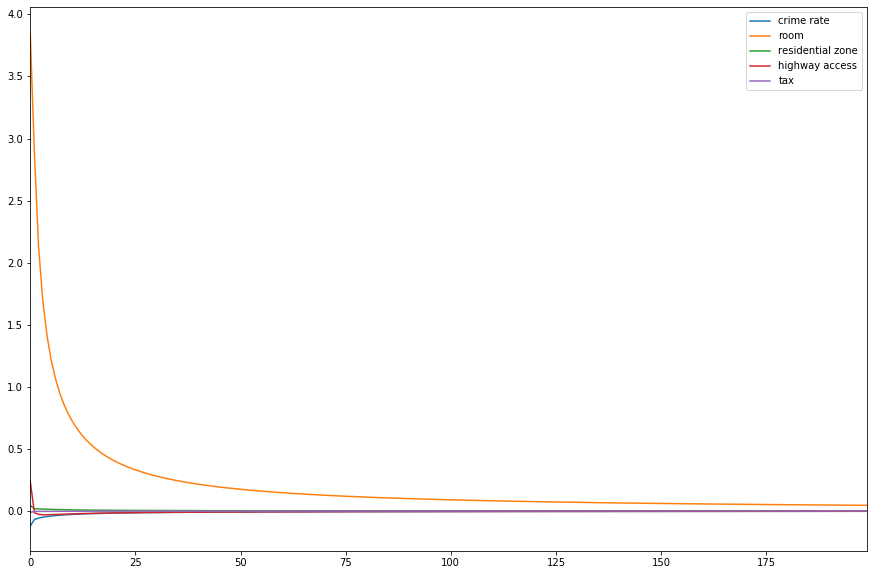

In [156]:
reg_coef_L.plot.line(figsize=(15,10))

Task 3


In [157]:
df4 = pd.DataFrame(columns=['room',
                   'residential zone', 
                   'highway access'
                    ,'crime rate'
                    ,'tax'],index= range(200))
df4.head()

,room,residential zone,highway access,crime rate,tax
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


In [158]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.30, random_state = 0)

from sklearn.linear_model import Lasso
reg_coef_Lasso = pd.DataFrame(columns=['crime rate',
                                   'room',
                   'residential zone', 
                   'highway access'
                    ,'tax']) 
Lasso_model =Lasso(fit_intercept=True,normalize=False,copy_X=True,alpha=4)
Lasso_model.fit(X_train, Y_train)
print(Lasso_model.coef_)

[-0.          0.03965108 -0.          0.          0.          0.
  0.03706659 -0.          0.         -0.00849255 -0.21079256  0.00464294
 -0.76847208]


In [159]:
for lamda in range(2,200):
  Lasso_model =Lasso(fit_intercept=True,normalize=False,copy_X=True,alpha=lamda)
  Lasso_model.fit(X_train, Y_train)
  print(Lasso_model.coef_)
  df5 = pd.DataFrame([[Lasso_model.coef_[0],Lasso_model.coef_[5],Lasso_model.coef_[1],Lasso_model.coef_[8],Lasso_model.coef_[9]]], columns=['crime rate',
                                   'room',
                   'residential zone', 
                   'highway access'
                    ,'tax'])

  reg_coef_Lasso=reg_coef_Lasso.append(df5,ignore_index=True)
  

[-0.01862745  0.03492301 -0.          0.         -0.          0.
  0.03679506 -0.13563556  0.10962638 -0.01040806 -0.72331012  0.00572906
 -0.79324229]
[-0.          0.03438163 -0.          0.          0.          0.
  0.03905923 -0.          0.00860482 -0.00736069 -0.47097901  0.00494431
 -0.78653034]
[-0.          0.03965108 -0.          0.          0.          0.
  0.03706659 -0.          0.         -0.00849255 -0.21079256  0.00464294
 -0.76847208]
[-0.          0.04348067 -0.          0.          0.          0.
  0.03405137 -0.          0.         -0.00977287 -0.          0.00450747
 -0.74609111]
[-0.          0.04064836 -0.          0.          0.          0.
  0.0263982  -0.          0.         -0.00998748 -0.          0.00485845
 -0.7075322 ]
[-0.          0.03778484 -0.          0.          0.          0.
  0.01873491 -0.          0.         -0.01020324 -0.          0.00521184
 -0.6689687 ]
[-0.          0.03492124 -0.          0.          0.          0.
  0.01107172 -0.       

In [160]:
reg_coef_Lasso

,crime rate,room,residential zone,highway access,tax
0,-0.018627,0.0,0.034923,0.109626,-0.010408
1,-0.000000,0.0,0.034382,0.008605,-0.007361
2,-0.000000,0.0,0.039651,0.000000,-0.008493
3,-0.000000,0.0,0.043481,0.000000,-0.009773
4,-0.000000,0.0,0.040648,0.000000,-0.009987
...,...,...,...,...,...
193,-0.000000,0.0,0.000000,-0.000000,-0.019294
194,-0.000000,0.0,0.000000,-0.000000,-0.019259
195,-0.000000,0.0,0.000000,-0.000000,-0.019225
196,-0.000000,0.0,0.000000,-0.000000,-0.019190


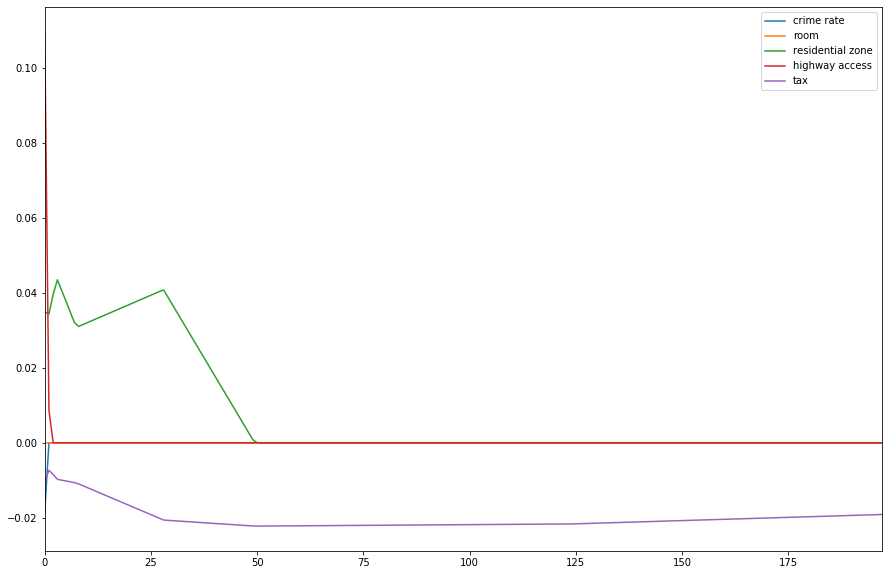

In [161]:
reg_coef_Lasso.plot.line(figsize=(15,10))

Task 4


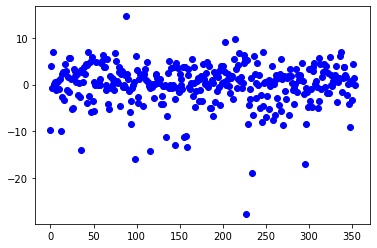

In [162]:

from sklearn.linear_model import LinearRegression
OLS_model =LinearRegression(fit_intercept=True,normalize=False,copy_X=True)
OLS_model.fit(X_train, Y_train)
predicted = OLS_model.predict(X_train)
predicted = predicted - Y_train
plt.scatter(range(354),predicted,c='b')
plt.show('ro')

Lamda equals 
1.0


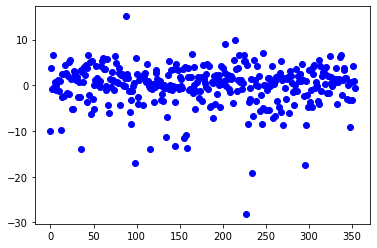

Lamda equals 
100.0


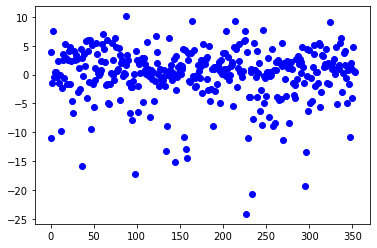

Lamda equals 
200.0


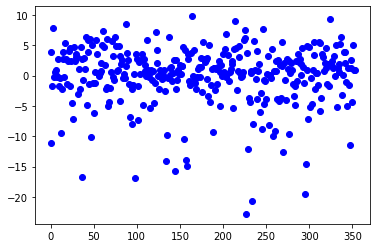

In [163]:

from sklearn.linear_model import Ridge
for x in range(1,4,1):
  Ridge_model =Ridge(fit_intercept=True,normalize=False,copy_X=True,alpha=x+98*(x-1)+(x-2)*(x-1)/2)
  Ridge_model.fit(X_train, Y_train)
  predicted = Ridge_model.predict(X_train)
  predicted = predicted - Y_train
  plt.scatter(range(354),predicted,c='b')
  print('Lamda equals ')
  print(x+98*(x-1)+(x-2)*(x-1)/2)
  plt.show('ro')



Lamda equals 
1.0


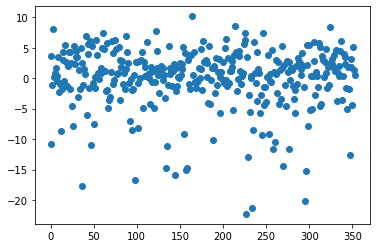

Lamda equals 
100.0


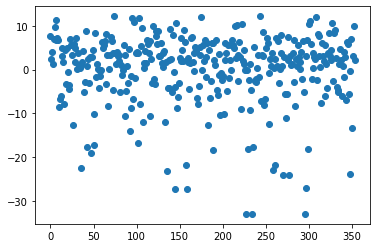

Lamda equals 
200.0


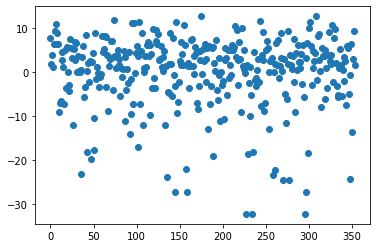

In [164]:
from sklearn.linear_model import Lasso
for x in range(1,4,1):
  Lasso_model =Lasso(fit_intercept=True,normalize=False,copy_X=True,alpha=x+98*(x-1)+(x-2)*(x-1)/2)
  Lasso_model.fit(X_train, Y_train)
  predicted = Lasso_model.predict(X_train)
  predicted = predicted - Y_train
  plt.scatter(range(354),predicted)
  print('Lamda equals ')
  print(x+98*(x-1)+(x-2)*(x-1)/2)
  plt.show()


Task 5


In [165]:
from sklearn.linear_model import Ridge
print('Ridge regression')
for x in range(1,4,1):
  Ridge_model =Ridge(fit_intercept=True,normalize=False,copy_X=True,alpha=x+98*(x-1)+(x-2)*(x-1)/2)
  Ridge_model.fit(X_train, Y_train)
  predicted_train = Ridge_model.predict(X_train)
  predicted_train = predicted_train - Y_train
  predicted_train = np.square( predicted_train)
  train_error = np.sqrt(predicted_train.sum()/354)
  predicted_test = Ridge_model.predict(X_test)
  predicted_test = predicted_test - Y_test
  #predicted_test = np.abs( predicted_test)
  predicted_test = np.square(predicted_test)
  test_error = np.sqrt(predicted_test.sum()/152)

  print('Lamda equals ')
  print(x+98*(x-1)+(x-2)*(x-1)/2)
  print('Mean Training error = ', train_error)
  print('Mean Test Error = ', test_error)


Ridge regression
Lamda equals 
1.0
Mean Training error =  4.488295184661377
Mean Test Error =  5.268987055608174
Lamda equals 
100.0
Mean Training error =  4.70448281621897
Mean Test Error =  5.461926446399837
Lamda equals 
200.0
Mean Training error =  4.810792099814276
Mean Test Error =  5.539707427944369


In [166]:
print('Lasso regression')
errorL = pd.DataFrame()
from sklearn.linear_model import Lasso
for x in range(1,4,1):
  Lasso_model =Lasso(fit_intercept=True,normalize=False,copy_X=True,alpha=x+98*(x-1)+(x-2)*(x-1)/2)
  Lasso_model.fit(X_train, Y_train)
  predicted_train = Lasso_model.predict(X_train)
  predicted_train = predicted_train - Y_train
  predicted_train = np.square( predicted_train)
  train_error = np.sqrt(predicted_train.sum()/354)
  predicted_test = Lasso_model.predict(X_test)
  predicted_test = predicted_test - Y_test
  predicted_test = np.square(predicted_test)
  test_error = np.sqrt(predicted_test.sum()/152)
  errorL=errorL.append(pd.Series([x+98*(x-1)+(x-2)*(x-1)/2,train_error,test_error]),ignore_index=True)
  print('Lamda equals ')
  print(x+98*(x-1)+(x-2)*(x-1)/2)
  print('Mean Training error = ', train_error)
  print('Mean Test Error = ', test_error)
errorL

Lasso regression
Lamda equals 
1.0
Mean Training error =  4.971571443561468
Mean Test Error =  5.687269907307778
Lamda equals 
100.0
Mean Training error =  8.05517088475685
Mean Test Error =  8.182032707539904
Lamda equals 
200.0
Mean Training error =  8.155103219797239
Mean Test Error =  8.270165968144854


,0,1,2
0,1.0,4.971571,5.687270
1,100.0,8.055171,8.182033
2,200.0,8.155103,8.270166


In [167]:
OLS_model = LinearRegression(fit_intercept=True,normalize=True,copy_X=True)
OLS_model.fit(X_train, Y_train)
predicted_train = OLS_model.predict(X_train)
predicted_train = predicted_train - Y_train
#predicted_test = np.abs( predicted_train)
predicted_train = np.square(predicted_train)
train_error = np.sqrt(predicted_train.sum()/354)
predicted_test = OLS_model.predict(X_test)
predicted_test = predicted_test - Y_test
#predicted_test = np.abs( predicted_test)
predicted_test = np.square(predicted_test)
test_error = np.sqrt(predicted_test.sum()/152)
print('OLS Regression')
print('Mean Training error = ', train_error)
print('Mean Test Error = ', test_error)


OLS Regression
Mean Training error =  4.4674623461466405
Mean Test Error =  5.214975145375403


Analysis.(To be placed before task 1, but placed here to conserve the order of required tasks)


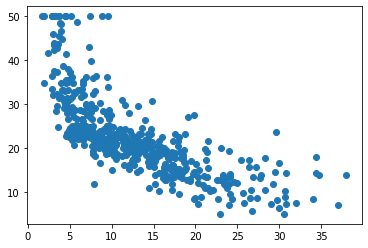

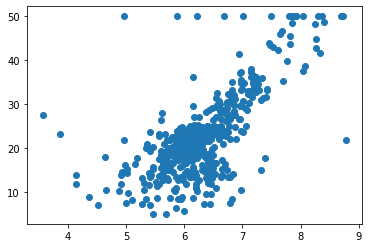

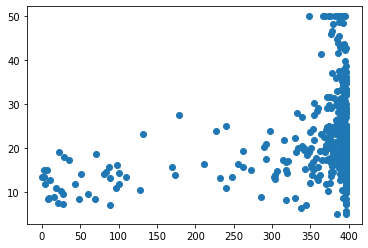

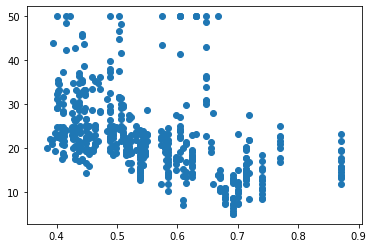

In [168]:
x= df['LSTAT']
y = df['PRICE']
plt.scatter(x, y, marker='o')
plt.show()
x= df['RM']
y = df['PRICE']
plt.scatter(x, y, marker='o')
plt.show()
x= df['B']
y = df['PRICE']
plt.scatter(x, y, marker='o')
plt.show()
x= df['NOX']
y = df['PRICE']
plt.scatter(x, y, marker='o')
plt.show()